In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics

import statsmodels.api as sm

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


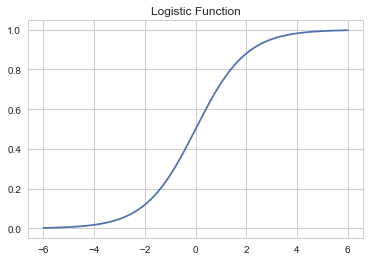

In [3]:
# A graph of the logistic function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t))

# Set t from -6 to 6 (500 Elements)
t = np.linspace(-6,6,500)

# Set up u values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title('Logistic Function')

In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
# We will create a column called Had_affair which will be
# set to 0 if the affairs column in 0, otherwise it will
# be set to 1.
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
    
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [7]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [8]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [9]:
# The above data seems to show that women that had 
# affairs where slightly older, married longer, and 
# slightly less religious, and less educated, but not
# by much

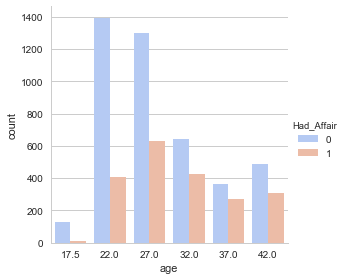

In [16]:
sns.factorplot('age',data=df,hue='Had_Affair',
               palette='coolwarm',kind='count')
# This suggests that the probability of having an
# affair increases with age.

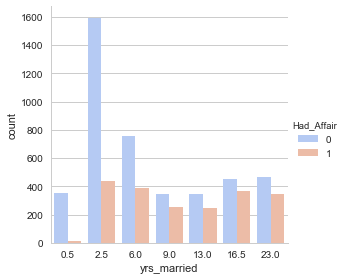

In [19]:
sns.factorplot('yrs_married',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

In [20]:
# The number of married years also affects the 
# probability of having an affair

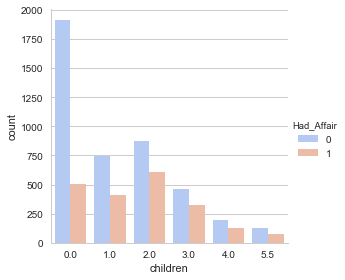

In [21]:
sns.factorplot('children',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

In [ ]:
# This graph shows that having more children 
# also increases the chance of having an affair

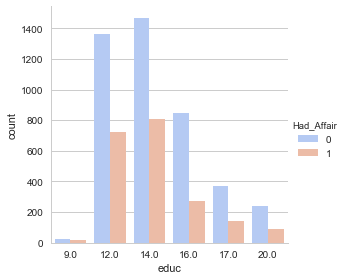

In [22]:
sns.factorplot('educ',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

In [23]:
# Overall having more education lowers the 
# probability of having and affair

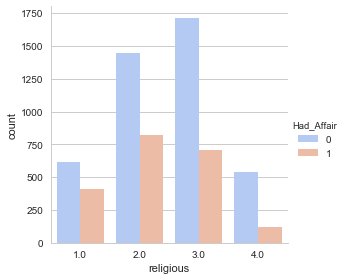

In [24]:
sns.factorplot('religious',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

In [25]:
# Being more religious also deminishes the probabily
# of having an affair

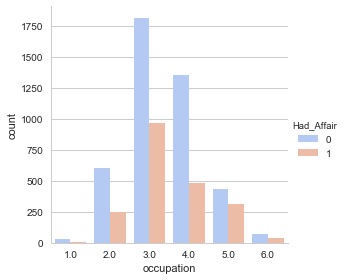

In [26]:
sns.factorplot('occupation',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

In [ ]:
# It seems that a white-collar working woman is more
# likely to cheat and the Teacher, Social Worker, Writer
# artist, nurse group is less likely to win

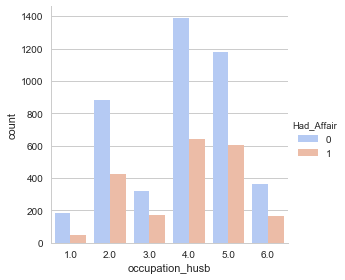

In [27]:
sns.factorplot('occupation_husb',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

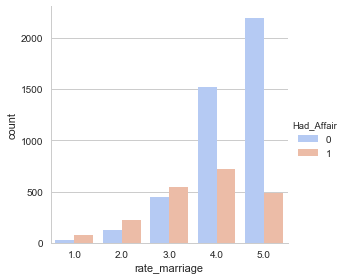

In [28]:
sns.factorplot('rate_marriage',data=df,kind='count',
               hue='Had_Affair',palette='coolwarm')

In [29]:
# The rating states the obvious assumption that 
# the better the marriages rating is the less
# likely there is to be cheating.

In [37]:
# Occupation and husbands occupation are categorical
# variables. Pandas has a built in method of getting 
# dummy variables and making new columns out of them.

# Here we create new data_frames for the categorial 
# variables

occ_dummies = pd.get_dummies(df['occupation'])

hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [40]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [41]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [42]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4',
                      'occ5','occ6']

hus_occ_dummies.columns = ['hocc1','hocc2','hocc3',
                           'hocc4','hocc5','hocc6']

In [44]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [58]:
X = df.drop(['occupation','occupation_husb',
            'Had_Affair'], axis=1)

In [59]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],
                   axis=1)

In [48]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [52]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [60]:
X = pd.concat([X,dummies],axis=1)

In [54]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [66]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [61]:
# Multicolinearity Consideration 

# Occurs due to dummy variables created. The variables
# are highly corralated as in if we know there is a 
# value of 1 for one of them then we know all others
# are 0 in the 'occ' columns and same goes for 
# 'hocc' columns.

# We must then drop a variable from each set at the cost
# of loosing a dataset point.

X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# We drop the affairs columsn since we already have a 
# discreet variable with that information

X = X.drop('affairs',axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [62]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [67]:
# We need to flatten the array to a 1 d array 
# for scikit learn

y = np.ravel(Y)
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
6336    0
6337    0
6338    0
6339    0
6340    0
6341    0
6342    0
6343    0
6344    0
6345    0
6346    0
6347    0
6348    0
6349    0
6350    0
6351    0
6352    0
6353    0
6354    0
6355    0
6356    0
6357    0
6358    0
6359    0
6360    0
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [71]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

# We have approximately a 73% rating. We can compare
# this to the original data by taking the mean. Since
# The Y data is in the form of 0's and 1's then we
# can calculate the percentage of women who reported
# having an affair.

0.72588752748978946

In [70]:
Y.mean()
# percentage of women that had affairs (~ 32%)
# This means that if our model simply guess 'no affair'
# we would have had 1-0.32=0.68 accuracy. So while we
# are doing better then the null error rate we are
# not doing that much better


0.3224945020420987

In [73]:
# We are going to check the coefficients in the model 
# to determine which are the stronger coefficients

coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [74]:
coeff_df

,0,1
0,rate_marriage,[-0.697845453825]
1,age,[-0.0563368031972]
2,yrs_married,[0.103893444136]
3,children,[0.0181853982481]
4,religious,[-0.368506616998]
5,educ,[0.00864804494766]
6,occ2,[0.298118794658]
7,occ3,[0.608150180777]
8,occ4,[0.346511273036]
9,occ5,[0.942259498161]


In [75]:
# Now we train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [77]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
class_predict = log_model2.predict(X_test)

In [79]:
print metrics.accuracy_score(Y_test,class_predict)

0.702261306533
